# https://www.kaggle.com/datasets/saulfuh/bart-ridership

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
df1=pd.read_csv("./Day 14 Students files/date-hour-soo-dest-2016.csv")
df1

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00
...,...,...,...,...
9971577,WOAK,PLZA,1,2016-12-31 23:00:00
9971578,WOAK,POWL,30,2016-12-31 23:00:00
9971579,WOAK,RICH,2,2016-12-31 23:00:00
9971580,WOAK,ROCK,2,2016-12-31 23:00:00


In [3]:
df2=pd.read_csv("./Day 14 Students files/date-hour-soo-dest-2017.csv")
df2

,Origin,Destination,Throughput,DateTime
0,12TH,19TH,1,2017-01-01 00:00:00
1,12TH,24TH,2,2017-01-01 00:00:00
2,12TH,BAYF,1,2017-01-01 00:00:00
3,12TH,CIVC,5,2017-01-01 00:00:00
4,12TH,COLS,2,2017-01-01 00:00:00
...,...,...,...,...
3313620,WSPR,MONT,1,2017-05-03 23:00:00
3313621,WSPR,NBRK,1,2017-05-03 23:00:00
3313622,WSPR,NCON,1,2017-05-03 23:00:00
3313623,WSPR,SANL,2,2017-05-03 23:00:00


In [4]:
df1.columns=["Origin Station","Destination Station", "Trip Count", "DateTime"]
df2.columns=["Origin Station","Destination Station", "Trip Count", "DateTime"]

df=pd.concat([df1,df2])

In [5]:
df

,Origin Station,Destination Station,Trip Count,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00
...,...,...,...,...
3313620,WSPR,MONT,1,2017-05-03 23:00:00
3313621,WSPR,NBRK,1,2017-05-03 23:00:00
3313622,WSPR,NCON,1,2017-05-03 23:00:00
3313623,WSPR,SANL,2,2017-05-03 23:00:00


In [6]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Day_name']= df['DateTime'].dt.day_name()
df['Hour'] = df['DateTime'].dt.hour

df.drop('DateTime', axis=1, inplace=True)

In [7]:
df

,Origin Station,Destination Station,Trip Count,Year,Month,Day,Day_name,Hour
0,12TH,12TH,1,2016,1,1,Friday,0
1,12TH,16TH,1,2016,1,1,Friday,0
2,12TH,24TH,4,2016,1,1,Friday,0
3,12TH,ASHB,4,2016,1,1,Friday,0
4,12TH,BALB,2,2016,1,1,Friday,0
...,...,...,...,...,...,...,...,...
3313620,WSPR,MONT,1,2017,5,3,Wednesday,23
3313621,WSPR,NBRK,1,2017,5,3,Wednesday,23
3313622,WSPR,NCON,1,2017,5,3,Wednesday,23
3313623,WSPR,SANL,2,2017,5,3,Wednesday,23


In [8]:
df.isnull().sum()

Origin Station         0
Destination Station    0
Trip Count             0
Year                   0
Month                  0
Day                    0
Day_name               0
Hour                   0
dtype: int64

In [9]:
# Which BART station is the busiest?

In [10]:
grouped = df. groupby('Origin Station')['Trip Count'].sum()
grouped1 = df.groupby('Destination Station')['Trip Count'].sum()

total=grouped.add(grouped1)
most_busy_station = total.idxmax()

print("Busiest station:", most_busy_station)

Busiest station: EMBR


In [11]:
# What is the least popular BART route?

In [12]:
grouped = df.groupby(['Origin Station', 'Destination Station'])['Trip Count'].sum()

least_popular_route = grouped.idxmin()
least_popular_trip_count = grouped[least_popular_route]

print("Least popular route:", least_popular_route)
print("number of Trips", least_popular_trip_count)

Least popular route: ('WSPR', 'SBRN')
number of Trips 40


In [13]:
# When is the best time to go to SF from Berkeley if you want to find a seat?

In [14]:
# Filtering trips and passenger hours from DBRK to CIVC
filtered_df = df[(df['Origin Station']== 'DBRK') & 
                 (df['Destination Station'] == 'CIVC') & 
                 (df['Trip Count'] > 0)]

# Calculation of the number of passengers according to passenger hours
hourly_passenger_counts = filtered_df.groupby('Hour')['Trip Count'].sum()

# Writing to results
print("Passenger counts for all hours:")
print(hourly_passenger_counts)

Passenger counts for all hours:
Hour
0      3167
1       626
2         8
4        50
5       925
6      3670
7     12916
8     28776
9     31899
10    18767
11    13675
12    13818
13    13889
14    13312
15    12903
16    14593
17    21486
18    24130
19    19568
20    11596
21     9150
22     8316
23     6829
Name: Trip Count, dtype: int64


In [15]:
# Which day of the week is the busiest?

In [16]:
grouped = df.groupby('Day_name')['Trip Count'].sum()


most_busy_day = grouped.idxmax()
most_busy_trip_count = grouped[most_busy_day]

print("Most_Busy_Day:", most_busy_day)
print("Most_ Busy Trip: ", most_busy_trip_count)

Most_Busy_Day: Wednesday
Most_ Busy Trip:  30677189


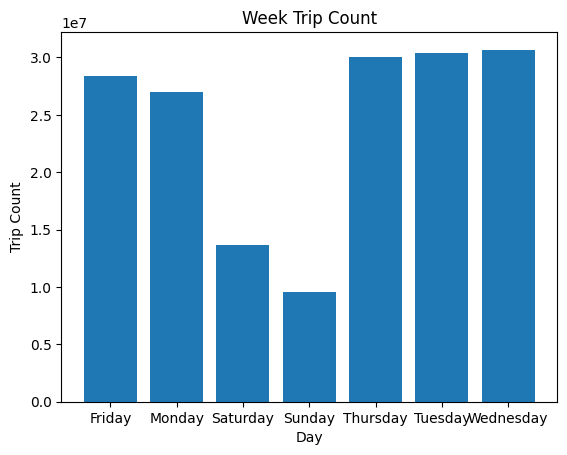

In [17]:
plt. bar(grouped.index, grouped.values)
plt.xlabel('Day')
plt.ylabel('Trip Count')
plt.title('Week Trip Count')
plt.show()

In [18]:
# How many people take the BART late at night?

<Axes: xlabel='Hour', ylabel='count'>

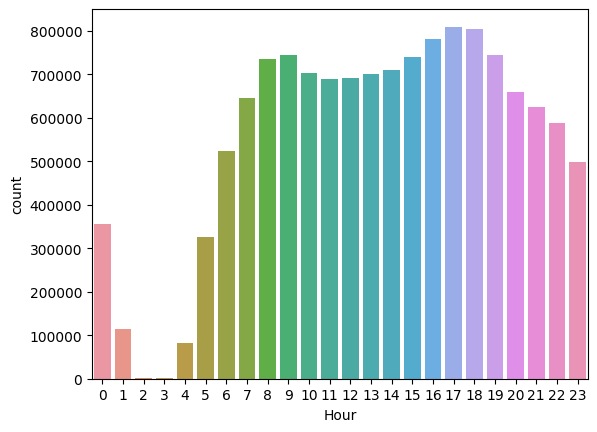

In [19]:
sns.countplot(x=df['Hour'])

In [20]:
filtered_data = df[(df['Hour'] >= 0) & (df['Hour'] <= 5)]
total_passenger_count = filtered_data ['Trip Count'].sum()

total_passenger_count

3915880

In [21]:
#  Compute the straight line distance between every station?

In [22]:
df3=pd.read_csv('./Day 14 Students files/station_info.csv')

In [23]:
df3.head()

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)


In [24]:
df3.drop(['Description', 'Name'], axis=1, inplace=True)

In [25]:
df3

,Abbreviation,Location
0,12TH,"-122.271450,37.803768,0"
1,16TH,"-122.419694,37.765062,0"
2,19TH,"-122.268602,37.808350,0"
3,24TH,"-122.418143,37.752470,0"
4,ASHB,"-122.270062,37.852803,0"
5,BALB,"-122.447506,37.721585,0"
6,BAYF,"-122.126514,37.696924,0"
7,CAST,"-122.075602,37.690746,0"
8,CIVC,"-122.414123,37.779732,0"
9,COLS,"-122.196869,37.753661,0"


In [26]:
df3[['Latitude', 'Longitude', 'Altitude']]= df3['Location'].str.split(',', expand=True).astype(float)

df3.drop(['Altitude', 'Location'], axis=1, inplace=True)
#df3.drop(['Location'], axis=1)

df3

,Abbreviation,Latitude,Longitude
0,12TH,-122.271450,37.803768
1,16TH,-122.419694,37.765062
2,19TH,-122.268602,37.808350
3,24TH,-122.418143,37.752470
4,ASHB,-122.270062,37.852803
5,BALB,-122.447506,37.721585
6,BAYF,-122.126514,37.696924
7,CAST,-122.075602,37.690746
8,CIVC,-122.414123,37.779732
9,COLS,-122.196869,37.753661


In [31]:
def calculate_distance( lat1, lon1, lat2, lon2):

    # Radvan cinsinden dönüsüm
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # lat ve lon hesaplamalari
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    # Haversine formülü
    a = math.sin(delta_lat / 2) ** 2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Dünya yariçapa (km)
    radius = 6371

    # Mesafe hesaplama
    distance = radius * c

    return distance

# Istasyonlar arasindaki mesafeleri hesaplamak için bos bir veri cerçevesi olusturun
distances = pd.DataFrame(columns= ['Station1', 'Station2', 'Distance'])


# Her bir istasyon çifti için mesafeyi hesaplayin ve sonuçlara distances veri çerçevesine ekleyin
for i in range(len (df3)):
    for j in range(i+1, len(df3)):
        station1 = df3.loc [i, 'Abbreviation']
        station2 = df3.loc[j, 'Abbreviation']
        lat1 = df3.loc[i, 'Latitude']
        lon1 = df3.loc[i, 'Longitude']
        lat2 = df3.loc[j, 'Latitude']
        lon2 = df3.loc[j, 'Longitude']
        distance = calculate_distance (lat1, lon1, lat2, lon2)
        distances = pd.concat([distances, pd.DataFrame([[station1, station2, distance]], 
                                                       columns=['Station1', 'Station2', 'Distance'])
                              ])
                                                                  
                                                                  
# Sonuçlari göster
print(distances)

   Station1 Station2   Distance
0      12TH     16TH  16.644038
0      12TH     19TH   0.417475
0      12TH     24TH  16.594540
0      12TH     ASHB   2.915261
0      12TH     BALB  20.178291
..      ...      ...        ...
0      WARM     WDUB  11.686062
0      WARM     WOAK  43.424600
0      WCRK     WDUB  19.668929
0      WCRK     WOAK  26.001852
0      WDUB     WOAK  41.267809

[1035 rows x 3 columns]


In [32]:
# Build a model that can predict the number of people commuting to work by Bart between any 2 stations:

In [34]:
# Filter registrations between 16:00 and 18:00 on weekdays
filtered_df = df[(df['Day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &
                 (df ['Hour'].isin([16,17, 18]))]

# Calculate the number of trips
trip_count = filtered_df['Trip Count'].sum ()

# Number of trips on weekdays at 16, 17 and 18 hours divided by 5
average_trip_count = trip_count / 5

# Print results
print("Total number of trips made between 16:00 and 18:00 on weekdays:”", trip_count)
print("Average daily number of trips made between 16:00 and 18:00 on weekdays:", average_trip_count)

Total number of trips made between 16:00 and 18:00 on weekdays:” 43190164
Average daily number of trips made between 16:00 and 18:00 on weekdays: 8638032.8


In [35]:
filtered_df = df[(df ['Day_name'].isin( ['Sunday'])) &
                 (df ['Hour'].isin( [16, 17, 18]))]

trip_count_sun = filtered_df['Trip Count'].sum() #sunday between 17-18
average_trip_count_sun = trip_count_sun

average_trip_count_sun

2284191

In [37]:
#We subtracted the number of people who went on Sunday from the weekday average
print('while outgoing ones average: ', average_trip_count - average_trip_count_sun)

while outgoing ones average:  6353841.800000001


In [39]:
# Here we only take the leaving time, there may be students on the way at 8 in the morning

In [38]:
df

,Origin Station,Destination Station,Trip Count,Year,Month,Day,Day_name,Hour
0,12TH,12TH,1,2016,1,1,Friday,0
1,12TH,16TH,1,2016,1,1,Friday,0
2,12TH,24TH,4,2016,1,1,Friday,0
3,12TH,ASHB,4,2016,1,1,Friday,0
4,12TH,BALB,2,2016,1,1,Friday,0
...,...,...,...,...,...,...,...,...
3313620,WSPR,MONT,1,2017,5,3,Wednesday,23
3313621,WSPR,NBRK,1,2017,5,3,Wednesday,23
3313622,WSPR,NCON,1,2017,5,3,Wednesday,23
3313623,WSPR,SANL,2,2017,5,3,Wednesday,23


In [42]:
df['Day_name'].value_counts()

Day_name
Friday       2054998
Wednesday    2047453
Tuesday      2032030
Thursday     2023617
Monday       1960826
Saturday     1696006
Sunday       1470277
Name: count, dtype: int64

In [43]:
days={'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday': 7}

In [44]:
df['Day_name']=df['Day_name'].map(days)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13285207 entries, 0 to 3313624
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Origin Station       object
 1   Destination Station  object
 2   Trip Count           int64 
 3   Year                 int32 
 4   Month                int32 
 5   Day                  int32 
 6   Day_name             int64 
 7   Hour                 int32 
dtypes: int32(4), int64(2), object(2)
memory usage: 709.5+ MB


In [46]:
grouped3 = pd.DataFrame()

In [47]:
grouped3 = df[df['Hour'].isin( [16, 17, 18])]
grouped3 = grouped3[grouped3['Day_name'].isin([1,2,3,4,5,6])]

In [48]:
grouped3

,Origin Station,Destination Station,Trip Count,Year,Month,Day,Day_name,Hour
12643,12TH,16TH,6,2016,1,1,5,16
12644,12TH,19TH,1,2016,1,1,5,16
12645,12TH,24TH,3,2016,1,1,5,16
12646,12TH,ASHB,6,2016,1,1,5,16
12647,12TH,BALB,4,2016,1,1,5,16
...,...,...,...,...,...,...,...,...
3306902,WSPR,SHAY,5,2017,5,3,3,18
3306903,WSPR,UCTY,7,2017,5,3,3,18
3306904,WSPR,WCRK,2,2017,5,3,3,18
3306905,WSPR,WOAK,2,2017,5,3,3,18


In [52]:
grouped4= grouped3.groupby(['Hour', 'Origin Station', 'Destination Station', 'Day_name']).agg({'Trip Count': 'sum'}).reset_index()

In [53]:
grouped4

,Hour,Origin Station,Destination Station,Day_name,Trip Count
0,16,12TH,12TH,1,195
1,16,12TH,12TH,2,259
2,16,12TH,12TH,3,278
3,16,12TH,12TH,4,260
4,16,12TH,12TH,5,266
...,...,...,...,...,...
37898,18,WSPR,WSPR,2,17
37899,18,WSPR,WSPR,3,14
37900,18,WSPR,WSPR,4,7
37901,18,WSPR,WSPR,5,10


In [55]:
x=grouped4.drop('Trip Count', axis=1)
y=grouped4[['Trip Count']]

In [56]:
x=pd.get_dummies(x, drop_first=True)

In [57]:
x.shape

(37903, 92)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso 
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def algo_test(x,y) :
    #Bütün modelleri tanimliyorum
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    kn=KNeighborsRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
    
    algos= [L, R, Lass, E, ETR, GBR, kn, dt, xgb]
    algo_names= ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'Extra Tree', 'Gradient Boosting', 'KNeighborsRegressor', 'KNeighborsRegressor', 'XGBRegressor']
    
    x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.2, random_state=42)
    
    r_squared=[]
    rmse=[]
    mae=[]
    
    #Hata ve dogruluk oranlaran bir tablo haline getirmek için bir dataframe olusturuyorun
    result=pd.DataFrame (columns= ['R_Squared', 'RMSE', 'MAE'], index=algo_names)
    
    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared. append (r2_score (y_test,p))
        rmse. append (mean_squared_error(y_test,p)**.5)
        mae. append (mean_absolute_error (y_test,p))
    
    #result adla tabloya dogruluk ve hata oranlarm verlestiriyorum
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
    
    #olusturdugum result tablosunu dogruluk oranina (r2 score) göre siralayip dönüyor 
    rtable=result.sort_values('R_Squared',ascending=False)
    return rtable

algo_test(x, y)

,R_Squared,RMSE,MAE
KNeighborsRegressor,0.956753,622.333847,185.282021
Extra Tree,0.952952,649.108018,190.006464
XGBRegressor,0.912267,886.398247,428.229644
KNeighborsRegressor,0.775283,1418.617896,736.819259
Gradient Boosting,0.739494,1527.411133,718.099816
Ridge,0.596985,1899.800972,874.728533
Linear,0.596940,1899.906887,875.524686
Lasso,0.593484,1908.035501,865.132047
ElasticNet,0.053974,2910.710048,1448.799436


In [60]:
# Using this data BART can plan how many BART cars will be able to run where in the future.
# Increase or decrease the number of workers according to density